In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Załadowania pliku z bieżącego folderu
data = pd.read_csv('./ex1data1.txt', header=None, names=['Population', 'Profit'])

### Linear regression with one variable

#### Zad 1)

In [191]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Zad 2)

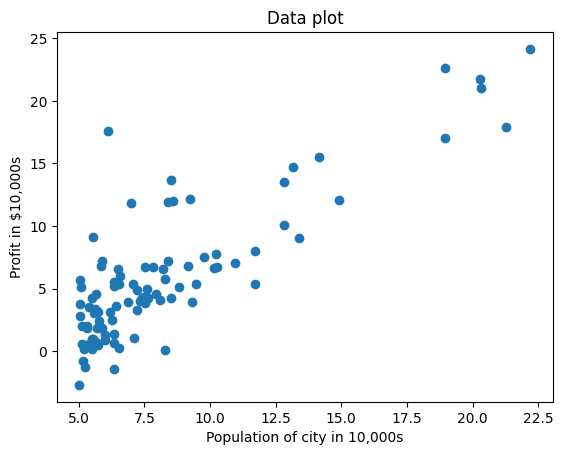

In [192]:
x = data.values[:, 0]
y = data.values[:, 1]

plt.plot(x, y, 'o')
plt.grid(False)
plt.title('Data plot')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#### Zad 3, 4)

In [193]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

#### Zad 5)

In [194]:
def h_funtion(X, theta):
    return theta.T @ X

def computeCost(X, y, theta):
    m = len(y)
    suma = np.sum(np.power(h_funtion(X, theta) - y, 2))
    return suma/(2*m)

#### Zad 6)

In [195]:
print(computeCost(X, y, theta))

32.072733877455676


#### Zad 7)

In [196]:
def simple_gradient(X, y, theta, alpha=0.01, n=1000):
    m = len(y)
    list_of_costs = []

    for _ in range(n):
        hx = h_funtion(X, theta)
        theta[0, 0] -= (alpha/m) * np.sum(hx-y)
        theta[1, 0] -= (alpha/m) * np.sum((hx-y)*X)
        list_of_costs.append(computeCost(X, y, theta))
        
    return theta, list_of_costs

#### Zad 8)

In [197]:
theta, list_of_costs = simple_gradient(X, y, theta)
print(theta)
# list_of_costs

[[-3.1268487]
 [ 1.1142497]]


#### Zad 9)

In [198]:
cost = computeCost(X, y, theta)
print(cost)

4.530916506333998


#### Zad 10)

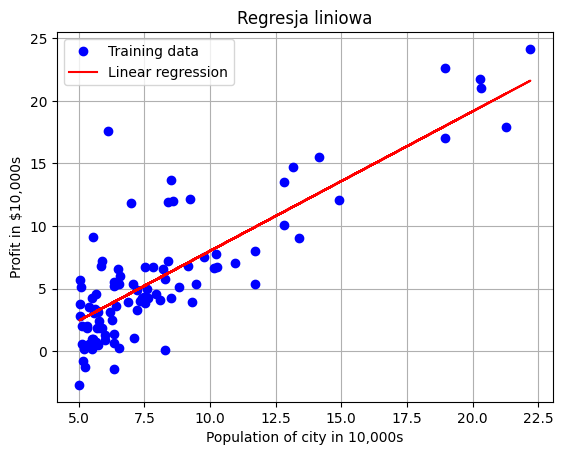

In [199]:
plt.figure()
plt.plot(x, y, 'bo')
x = data['Population']
plt.plot(x, theta[0, 0] + theta[1, 0]*x, 'r')
plt.grid()
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Training data', 'Linear regression'])
plt.title('Regresja liniowa')
plt.show()

#### Zad 11)

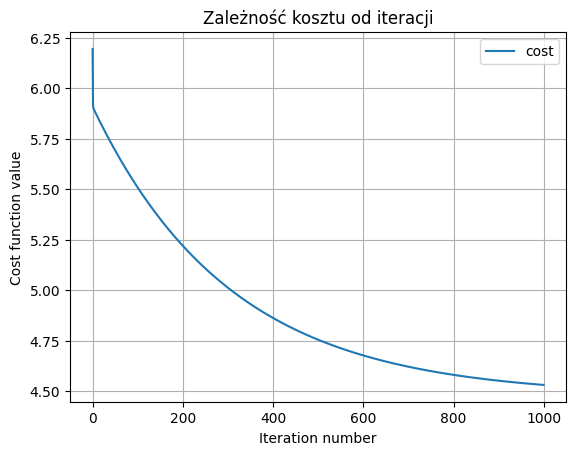

In [200]:
plt.figure()
plt.plot(list_of_costs)
plt.title('Zależność kosztu od iteracji')
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend(['cost'])
plt.grid()
plt.show()

### Linear regression with multiple variables

In [201]:
# Załadowanie danych z pliku z bieżącego folderu
data2 = pd.read_csv('./ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Zad 1)

In [202]:
data2_copy = data2
for column in data2_copy.columns:
    data2_copy[column] = (data2[column] - data2[column].mean()) / data2[column].std()

data2_copy.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### Zad 2)

In [203]:
x = data2_copy.values[:, :2]
y = data2_copy.values[:, 2]

one = np.ones(x.shape[0], dtype=np.float32)
one.shape = [1, one.shape[0]]
X = np.concatenate((one.T, x), axis=1).T
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

print(f'{computeCost(X, y, theta)} - cost')

theta, list_of_costs = simple_gradient(X, y, theta)
print(f'{computeCost(X, y, theta)} - final cost')

0.4893617021276595 - cost
0.1319044551865785 - final cost


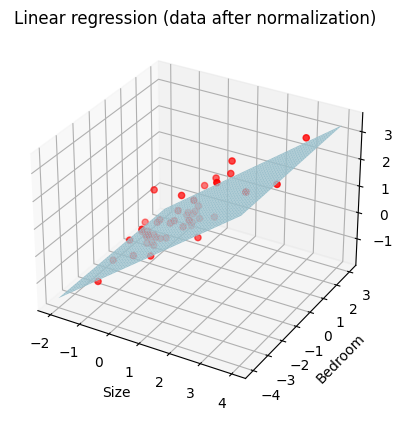

In [204]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y[:], color='red')
XX, YY = np.meshgrid(np.linspace(-2, 4, 30), np.linspace(-4, 3, 35))
z = theta[0] + theta[1]*XX + theta[2]*YY
ax.plot_surface(XX, YY, z, color='lightblue')
ax.set_xlabel('Size')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price')
ax.set_title('Linear regression (data after normalization)')
plt.show()

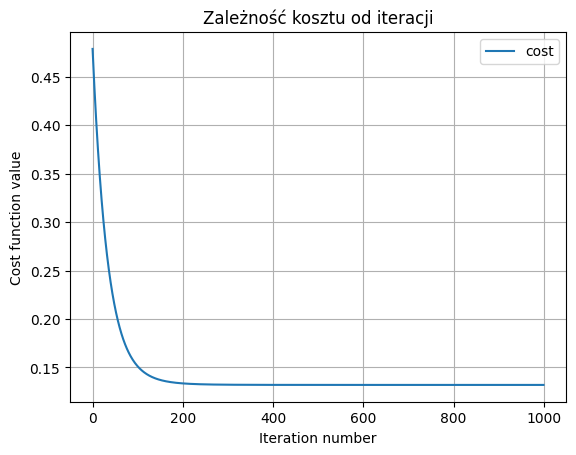

In [205]:
plt.figure()
plt.plot(list_of_costs)
plt.title('Zależność kosztu od iteracji')
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend(['cost'])
plt.grid()
plt.show()

### Linear regression with python packages

Coefficients: 
 [[1.12864259]]
Residual sum of squares: 7.83083810391192


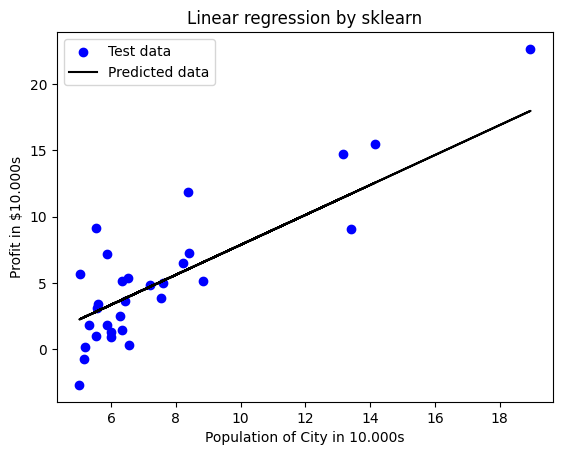

In [206]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

data = pd.read_csv('./ex1data1.txt', header=None, names=['Population', 'Profit'])

X = np.array(data['Population']).reshape(-1, 1)
Y = np.array(data['Profit']).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
regr = linear_model.LinearRegression()

# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.scatter(X_test, Y_test, color='b')
plt.plot(X_test, Y_predicted, color='k')
plt.title('Linear regression by sklearn')
plt.xlabel("Population of City in 10.000s")
plt.ylabel("Profit in $10.000s")
plt.legend(['Test data', 'Predicted data'])
plt.show()